## Q1. 매장별 유아 카시트 판매액 예측

`dt.csv` 데이터를 이용하여 회귀모형을 적합하려고 한다. 이는 매장별 유아 카시트 판매액(Sales)를 예측하기
위한 데이터 이다. 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는 유의수준 α = 0.05 사용)

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df = read_csv('./dt.csv')
str(df)

Rows: 400 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): Sales, CompPrice, Income, Advertising, Population, Price, Age, Educ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [400 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sales      : num [1:400] 9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num [1:400] 138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num [1:400] 73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num [1:400] 11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num [1:400] 276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num [1:400] 120 83 80 97 128 72 108 120 124 124 ...
 $ Age        : num [1:400] 42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num [1:400] 17 10 12 14 13 16 15 10 10 17 ...
 - attr(*, "spec")=
  .. cols(
  ..   Sales = col_double(),
  ..   CompPrice = col_double(),
  ..   Income = col_double(),
  ..   Advertising = col_double(),
  ..   Population = col_double(),
  ..   Price = col_double(),
  ..   Age = col_double(),
  ..   Education = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


(1) 이 데이터의 산점도 행렬을 그리시오.

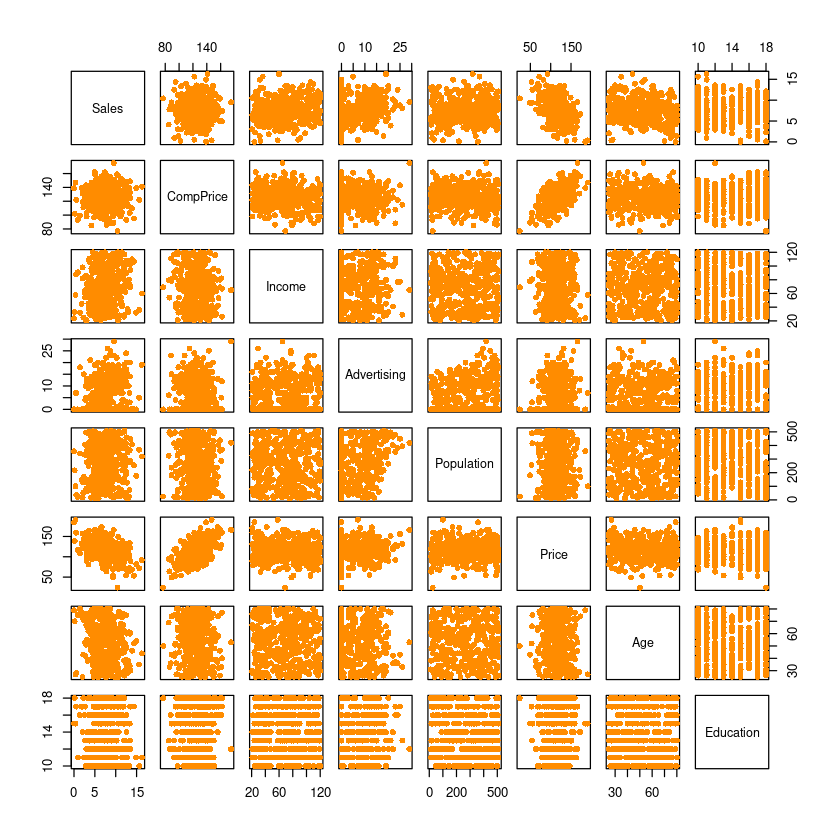

In [8]:
pairs(df, pch=16, col='darkorange')

(2) Sales를 예측하기 위한 중회귀분석을 하려고 한다. 이를 위한 모형을 설정하시오.

(3) 최소제곱법의 의한 회귀직선을 적합시키시키고, 모형 적합 결과를 설명하시오.

$S = \sum_{i=1}^n \epsilon_i^2=\sum_{i=1}^n(y_i - (\beta_0 + \beta_1x_{i1} + \dots \beta_7x_{i7}))^2$

최소제곱추정량: $(\hat{\beta}_0, \hat{\beta}_1,\dots, \hat{\beta}_7)=\underset{(\beta_0, \beta_1,\dots,\beta_7)\in \mathbb{R}^3}{\text{argmin}} \sum_{i=1}^n \{y_i - (\beta_0 + \beta_1x_{i1} + \dots \beta_7x_{i7})\}^2$

In [11]:
fit_Sales <- lm(Sales ~ ., data=df)
summary(fit_Sales)


Call:
lm(formula = Sales ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0598 -1.3515 -0.1739  1.1331  4.8304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.7076934  1.1176260   6.896 2.15e-11 ***
CompPrice    0.0939149  0.0078395  11.980  < 2e-16 ***
Income       0.0128717  0.0034757   3.703 0.000243 ***
Advertising  0.1308637  0.0151219   8.654  < 2e-16 ***
Population  -0.0001239  0.0006877  -0.180 0.857092    
Price       -0.0925226  0.0050521 -18.314  < 2e-16 ***
Age         -0.0449743  0.0060083  -7.485 4.75e-13 ***
Education   -0.0399844  0.0371257  -1.077 0.282142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.929 on 392 degrees of freedom
Multiple R-squared:  0.5417,	Adjusted R-squared:  0.5335 
F-statistic: 66.18 on 7 and 392 DF,  p-value: < 2.2e-16


(4) 회귀직선의 유의성 검정을 위한 가설을 설정하고, 분산분석표를 이용하여 가설 검정을 수행하시오.

$H_0: \beta_1=\beta_2 = \dots = \beta_7 = 0$

$H_1: \text{not } H_0$

In [12]:
null_model <- lm(Sales ~ 1, data=df) # H0
fit_Sales <- lm(Sales ~ ., data=df) # H1

anova(null_model, fit_Sales)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,399,3182.275,NA,NA,NA,NA
2,392,1458.562,7,1723.713,66.18021,1.413772e-62


(5) 오차의 분산에 대한 추정량을 구하시오.

(6) 결정계수와 수정된 결정계수를 구하시오.

In [13]:
summary(fit_Sales)


Call:
lm(formula = Sales ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0598 -1.3515 -0.1739  1.1331  4.8304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.7076934  1.1176260   6.896 2.15e-11 ***
CompPrice    0.0939149  0.0078395  11.980  < 2e-16 ***
Income       0.0128717  0.0034757   3.703 0.000243 ***
Advertising  0.1308637  0.0151219   8.654  < 2e-16 ***
Population  -0.0001239  0.0006877  -0.180 0.857092    
Price       -0.0925226  0.0050521 -18.314  < 2e-16 ***
Age         -0.0449743  0.0060083  -7.485 4.75e-13 ***
Education   -0.0399844  0.0371257  -1.077 0.282142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.929 on 392 degrees of freedom
Multiple R-squared:  0.5417,	Adjusted R-squared:  0.5335 
F-statistic: 66.18 on 7 and 392 DF,  p-value: < 2.2e-16


- $R^2 = 0.5417,\quad \text{adj-}R^2=0.5335 $

(7) 개별 회귀계수의 유의성검정을 수행하시오.

(8) 회귀계수에 대한 90% 신뢰구간을 구하시오.

(9) CompPrice = 100, Income = 70, Advertising = 20, Population = 300, Price = 80, Education = 12
인 지역에 위치한 매장의 평균 판매액을 예측하고, 95% 신뢰구간을 구하시오.

In [16]:
model_ = lm(Sales ~ .-Age , data=df)

In [20]:
new_df = data.frame(Age =30 , CompPrice=100, Income=70, Advertising = 20, Population = 300, Price = 80, Education = 12)
new_df

Age,CompPrice,Income,Advertising,Population,Price,Education
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30,100,70,20,300,80,12


In [21]:
predict(model_,
        newdata = new_df,
        interval = c('confidence'),
        level = 0.95) ## 평균반응

,fit,lwr,upr
1,10.14261,9.537128,10.7481


(10) 위 매장에 대하여 개별 판매액 예측하고, 95% 신뢰구간을 구하시오.

(11) 잔차에 대한 산점도를 그리고, 결과를 설명하여라.

(12) 잔차에 대한 등분산성 검정을 수행하여라.

(13) 잔차에 대한 히스토그램, QQ plot을 그리고, 정규성 검정을 수행하여라.

(14) 잔차에 대한 독립성 검정을 수행하시오.

## Q2. 다음 물음에 답하여라.

위 데이터에 대하여 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는 유의수준 α = 0.05 사용)

(1) 위에서 적합한 모형에서 개별 회귀계수의 유의성 검정 결과 유의하지 않은 변수는 무엇인가?

(2) 위에서 유의하지 않았던 변수를 제외한 모형을 축소모형(Reduced Model)으로 하는 부분 F검정을 수행
하여라. 검정에 필요한 가설을 설정하고, 검정 결과를 설명하시오.

(3) 1번에서 설정한 모형과, 축소모형 중 어느 모형이 이 데이터에 대한 설명을 잘 하고 있는지를 비교하시오.

## Q3. 일반 선형 가설검정 (General Linear Hypothesis Test)을 수행하여라.

1번에서 설정한 모형에 대하여 아래의 일반 선형 가설검정(General Linear Hypothesis Test)을 수행하시오.
(R을 이용하여 풀이)(검정에서는 유의수준 α = 0.05 사용)(회귀계수는 βi 로 표현해야 하지만, 각자 설정이
다를 수가 있기 때문에 회귀계수 대신 변수 이름을 사용하겠음. 예 β1 =CompPrice)

(1) $H_0 : \text{CompPrice}=\text{Income} \text{ vs. } H_1 : \text{not } H_0$

(2) $H_0 : \text{CompPrice}= -\text{Price} \text{ vs. } H_1 : \text{not } H_0$

(3) $H_0$를 기각할 수 있는 제약조건을 만들어 보시오.(단 2개 이상의 변수 사용)